# Final Exam Computer Programming

In [1]:
# please print your name and student_id
name = "Ulugbek Shernazarov"
id="st125457"

# 1. Load the dataset - (1 marks)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# 2. Data Analysis (EDA) - (4+1 marks)



In [6]:
df.isna().sum()
# No null values, its good

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
for feature in df.columns:
    unique_feat = df[feature].unique()
    print(feature, unique_feat, len(unique_feat))

# We see that Gender feature has 3 values - but in data_types dictionary it was specified only two, probably gonna remove Other value as per consistency
# After observing the values, the following features can be considered as categorical (that are already in binary format - no need to scale them):
# 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes' - y

gender ['Female' 'Male' 'Other'] 3
age [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48] 102
hypertension [0 1] 2
heart_disease [1 0] 2
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current'] 6
bmi [25.19 27.32 23.45 ... 59.42 44.39 60.52] 4247
HbA1c_level [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8] 18
blood_glucose_level [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300

In [8]:
cat_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
num_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[cat_columns].shape, df[num_columns].shape

((100000, 5), (100000, 4))

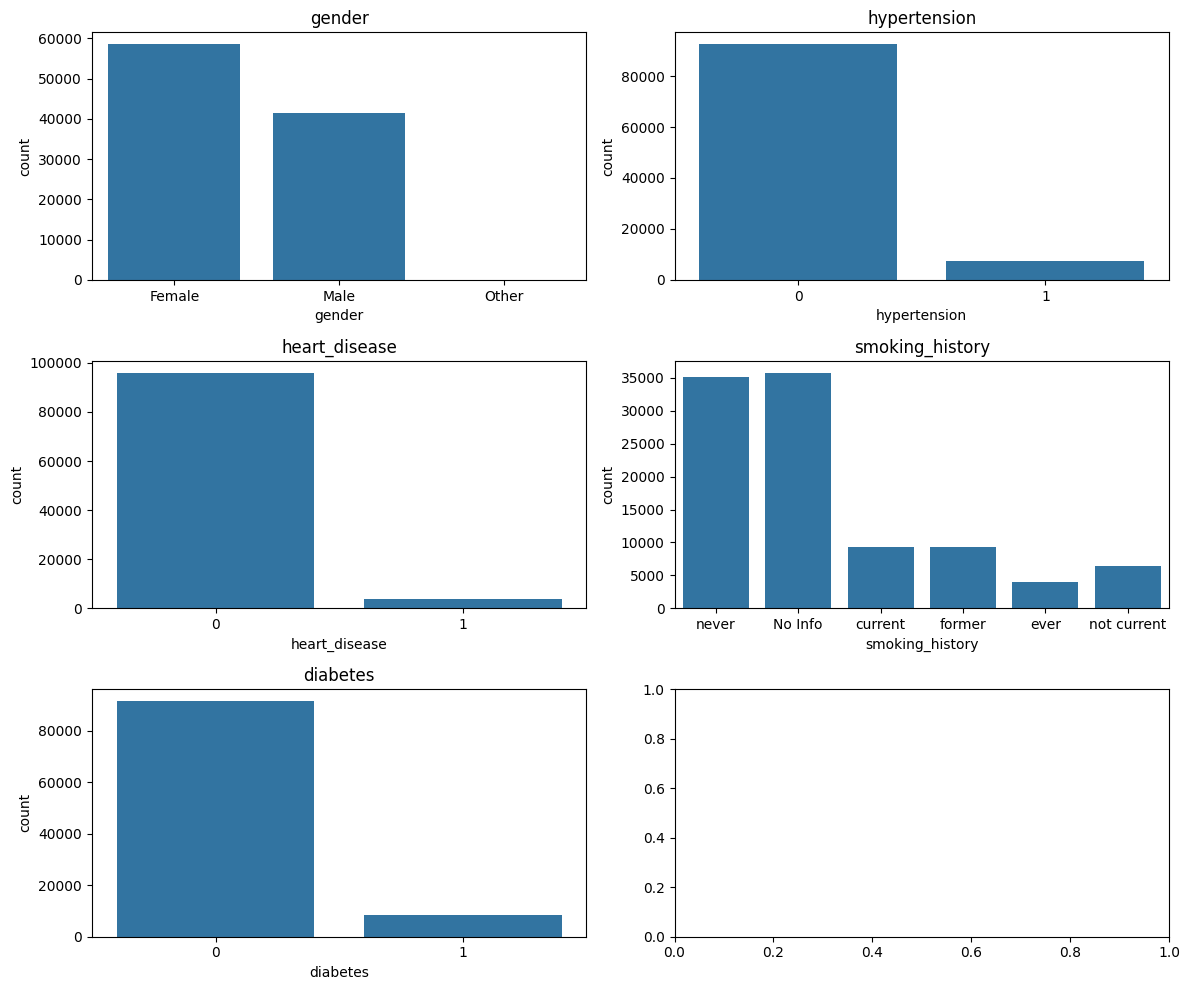

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(cat_columns):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

In [10]:
df.gender.value_counts()

# Based on the low number of gender's other value, I will remove those rows
# And since in data_types it was mentioned only Male, Female, given this assumption, I am dropping other values:
df_processed = df.drop(df[df.gender=='Other'].index)
df_processed.shape, df.shape

((99982, 9), (100000, 9))

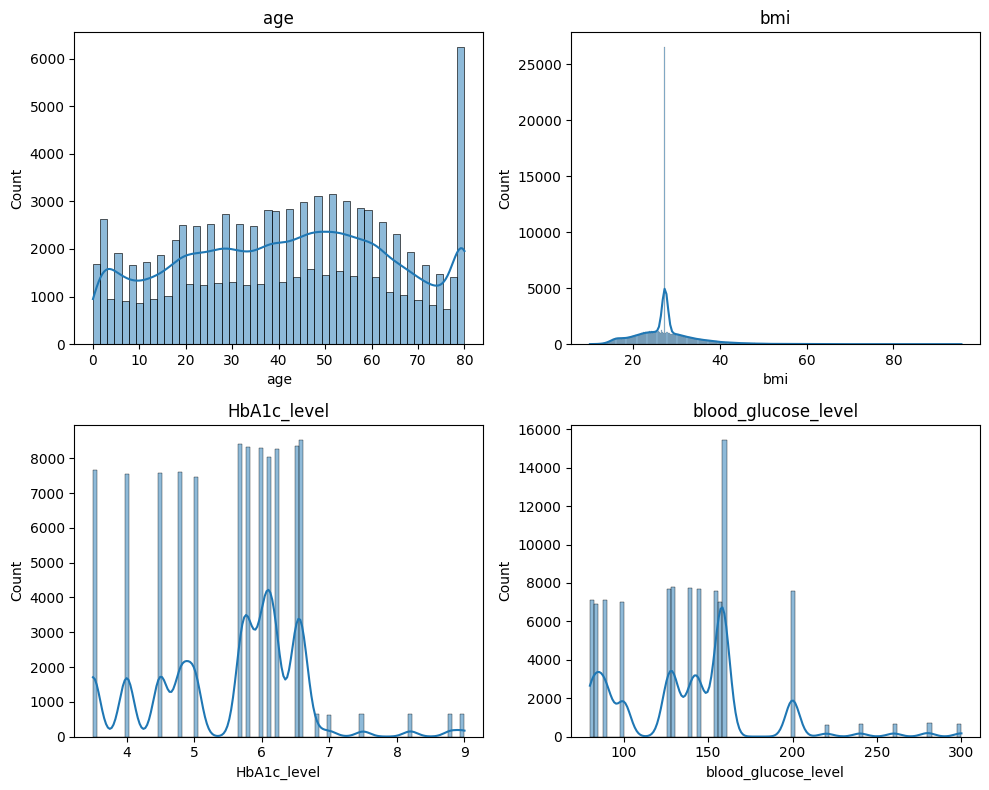

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, feature in enumerate(num_columns):
    sns.histplot(df_processed[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

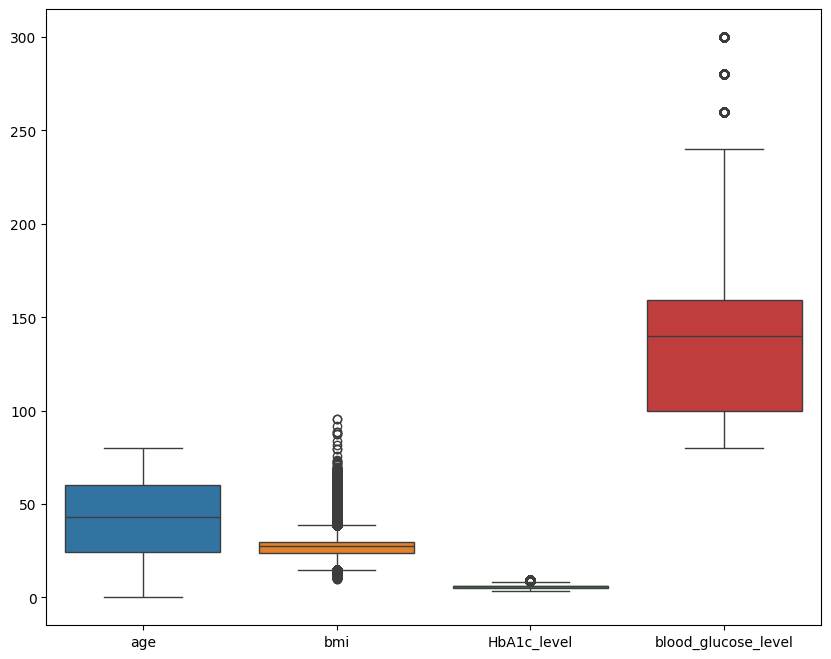

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_processed[num_columns])
plt.show()

We can see that we need to scale our features since they are in different scales

In [13]:
# Duplicates
# We have 3865 duplicate rows, gonnad drop them
print(df_processed.duplicated().value_counts())
print(df_processed.shape)
df_processed.drop_duplicates(inplace=True)
df_processed.shape

False    96128
True      3854
dtype: int64
(99982, 9)


(96128, 9)

In [14]:
# Outliers check
def outlier_num(df, feature):
    IQR1 = df[feature].quantile(0.25)
    IQR2 = df[feature].quantile(0.75)

    dist = IQR2 - IQR1

    outliers = df[(df[feature] + dist < IQR1) | (df[feature] - dist > IQR2)]

    print(f"Feature {feature} has {len(outliers)} outliers")


for feat in num_columns:
    outlier_num(df_processed, feat)

# Our policy could be stretching them inside the distribution, or simply dropping them, but I dont want to take serious decisions yet
# Will comeback here if I get some redundant/inefficient behavior in the model training

Feature age has 0 outliers
Feature bmi has 13877 outliers
Feature HbA1c_level has 1971 outliers
Feature blood_glucose_level has 3264 outliers


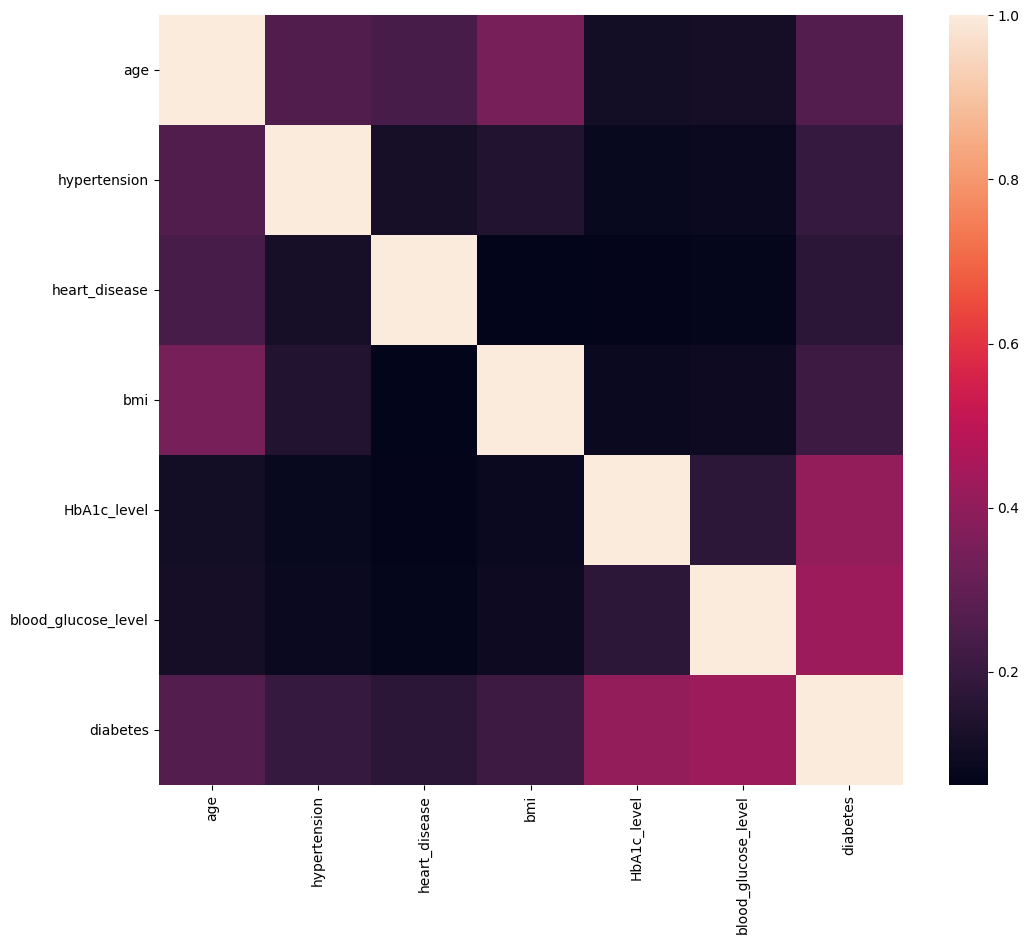

In [15]:
corr_features = df_processed.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_processed[corr_features].corr())
plt.show()

From EDA part, we can have the following outcomes:
1. No null values
2. Dropped 'other' value for gender since in data_types dictionary shared we assume only 'male' and 'female' gender existence
3. The dataset mostly has categorical features (some of them already encoded - 0/1)
4. bmi has most outliers - 14k almost
5. HbA1c_level and blood_glucose_level are discrete features, and it has high correlation with our outcome - diabetes, which I think is logical and mostly suited.
6. Since bmi, as I think, has not much importance (assuming for now), dealing with outliers in that feature is neglected for now.
7. There were 3854 duplicated rows - dropped.
8. The dataset is interesting, but I dont think it can provide pure imitation of predicting diabetes - probably need more realistic features.

In [16]:
# Selecting columns
cat_columns = ['gender', 'smoking_history']
num_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
already_encoded_columns = ['hypertension', 'heart_disease']
target_column = ['diabetes']

X = df_processed[cat_columns + num_columns + already_encoded_columns]
y = df_processed[target_column]

X.shape, y.shape

((96128, 8), (96128, 1))

# 3. Modelling with Pipeline - (24 marks)

In [21]:
# Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train.shape, X_test.shape

((86515, 8), (9613, 8))

## 3.1 Encoding, Scalerisation, Splitting in pipeline - (4 marks)

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Proceeding with label encoder - some features has many string values
# No need for imputation since there are no missing values
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
])

# No need for imputation - no missing values
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

simple_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_columns),
    ('cat', categorical_transformer, cat_columns),
    ('no_transform', simple_transformer, already_encoded_columns)
])

## 3.2 Classification Model - (5 marks)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
clf.fit(X_train, y_train)

results = clf.predict(X_test)
results

d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
scores = cross_val_score(clf, X_train, y_train, cv=5)

print(scores)
print(np.argmax(scores))

d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[0.95948679 0.95890886 0.96023811 0.95971797 0.95838872]
2


d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 3.3 KMeans Modelling - (5 marks)

In [221]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

predicts = kmeans.predict(X_test)

d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[]

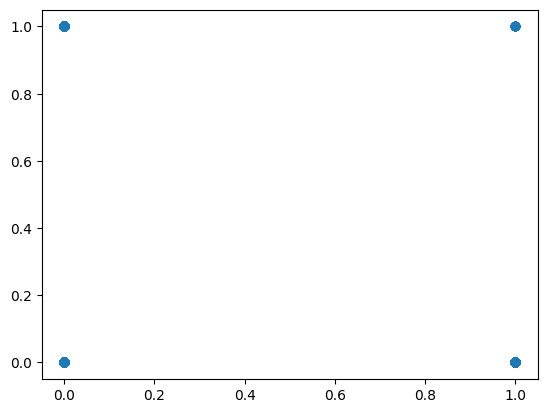

In [242]:
plt.scatter(predicts, y_test)
plt.plot()

## 3.4 Classfication Model of Clusters - (10 marks)

In [240]:
from sklearn.model_selection import GridSearchCV

params_grid = {'C': np.arange(0, 2, 0.2)}

model = GridSearchCV(LogisticRegression(), cv=5, param_grid=params_grid)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print(model.best_estimator_)
print(model.best_score_)

d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

LogisticRegression(C=0.8)
0.9593018551696237


d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Da

# 4. Analysis of the Models - (10 marks)

In [241]:
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# print(auc(x=predicts, y=predicts))

print(classification_report(y_test, results))

print(confusion_matrix(y_test, results))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8730
           1       0.85      0.61      0.71       883

    accuracy                           0.95      9613
   macro avg       0.91      0.80      0.84      9613
weighted avg       0.95      0.95      0.95      9613

[[8638   92]
 [ 344  539]]


No time

# 5. Deployment - (10 marks)

In [220]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(lr, f)

![image.png](ex.png)

![image.png](ex1.png)